In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The task from today's lab will be to predict whether passengers from the Titanic survided based on their age, gender and other information.

The data is from https://www.kaggle.com/c/titanic. You can find more information on each feature there.

The data is already split into train and test sets. We can use the pandas library to load the csv file(s).

In [2]:
data_train = pd.read_csv('titanic/train.csv')
print('There are {} rows and {} columns in this csv.'.format(data_train.shape[0], data_train.shape[1]))
data_train.head()

There are 891 rows and 12 columns in this csv.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will just use information on ticket class, ticket fare, passenger gender, passenger age, number of siblings on board and the port of embarcation, although more information could be extracted from other columns (for instance "Sir" in the name may be an indicator of nobility and may have predictive value).

In [3]:
data_train_features = data_train[["Pclass", "Fare", "Sex", "Age", "SibSp", "Embarked"]].copy()
data_train_features.head()

,Pclass,Fare,Sex,Age,SibSp,Embarked
0,3,7.2500,male,22.0,1,S
1,1,71.2833,female,38.0,1,C
2,3,7.9250,female,26.0,0,S
3,1,53.1000,female,35.0,1,S
4,3,8.0500,male,35.0,0,S


**Perform some explanatory data analysis. Information of interest may consist in the percentage of passengers who survived, the distribution of age among survivors and victims...**

Visual charts are more than welcome.

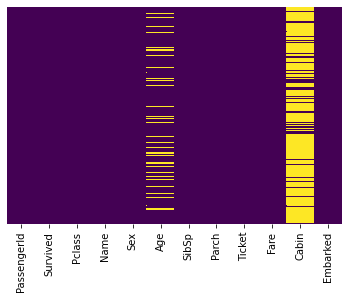

In [4]:
#Checking all nulls in the dataset
sns.heatmap(data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

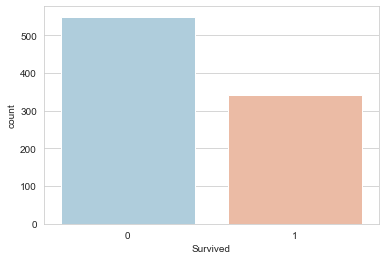

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data_train,palette='RdBu_r')

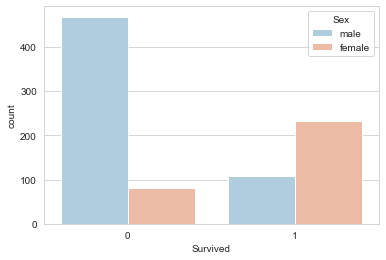

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data_train,palette='RdBu_r')

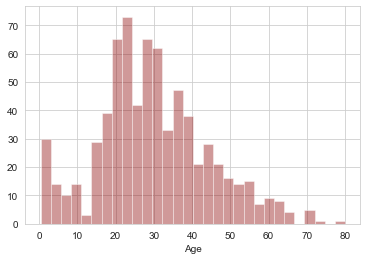

In [7]:
sns.distplot(data_train['Age'].dropna(),kde=False,color='darkred',bins=30)

Text(0.5, 1.0, 'Age Distribution by Survival')

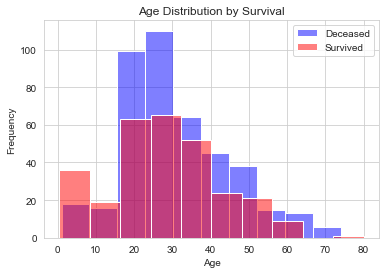

In [8]:
survivors_0 = data_train.loc[data_train["Survived"]==0, "Age"]
survivors_1 = data_train.loc[data_train["Survived"]==1, "Age"]

survivors_0.plot.hist(fc=(0, 0, 1, 0.5), label="Deceased")
survivors_1.plot.hist(fc=(1, 0, 0, 0.5), label="Survived")
plt.xlabel("Age")
plt.legend(loc='upper right')
plt.title("Age Distribution by Survival")

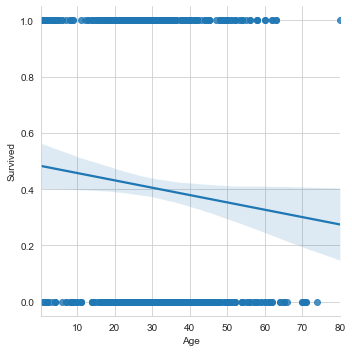

In [9]:
sns.lmplot('Age','Survived',data=data_train)

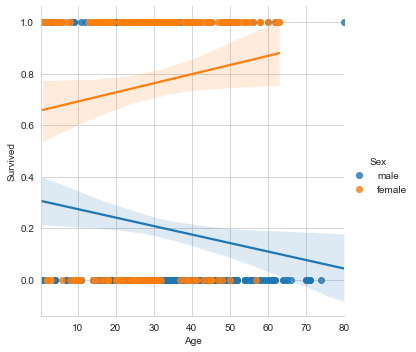

In [10]:
sns.lmplot('Age','Survived',data=data_train,hue='Sex')

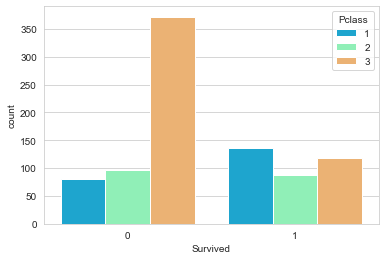

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data_train,palette='rainbow')

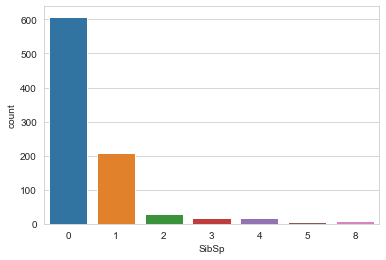

In [12]:
sns.countplot(x='SibSp',data=data_train)

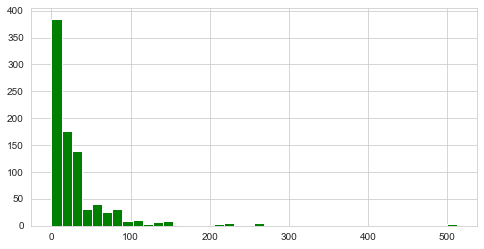

In [13]:
data_train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [14]:
data_train_features = data_train[["Pclass", "Fare", "Sex", "Age", "SibSp", "Embarked"]].copy()

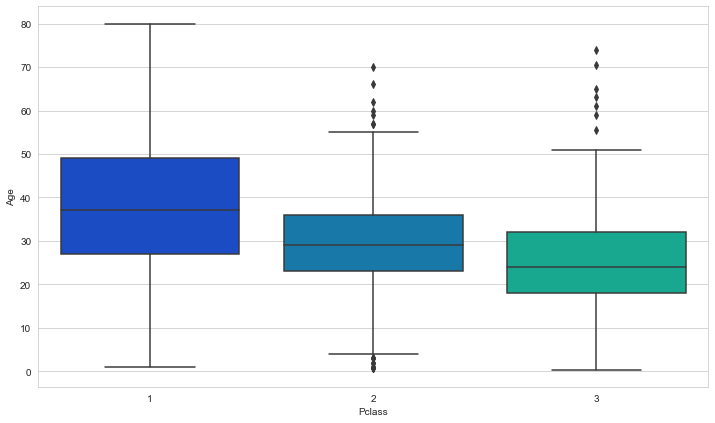

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data_train_features,palette='winter')

In [16]:
#There are many rows with no data about 'Age'. We replace the null values with the mean age by ticket class 
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [17]:
data_train_features['Age'] = data_train_features[['Age','Pclass']].apply(impute_age,axis=1)

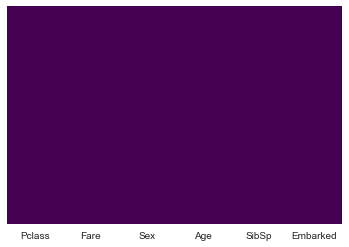

In [18]:
sns.heatmap(data_train_features.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
data_train_features = pd.get_dummies(data_train_features)

In [20]:
data_train_features

,Pclass,Fare,Age,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,7.2500,22.0,1,0,1,0,0,1
1,1,71.2833,38.0,1,1,0,1,0,0
2,3,7.9250,26.0,0,1,0,0,0,1
3,1,53.1000,35.0,1,1,0,0,0,1
4,3,8.0500,35.0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,13.0000,27.0,0,0,1,0,0,1
887,1,30.0000,19.0,0,1,0,0,0,1
888,3,23.4500,24.0,1,1,0,0,0,1
889,1,30.0000,26.0,0,0,1,1,0,0


In [21]:
y_data_train = data_train[["Survived"]]

**Transform the pandas dataframe into a numpy array suitable to train machine learning models.**

You may find useful functions in the sklearn documentation.

In [22]:
X_train_np = data_train_features.to_numpy()

In [23]:
X_train_np

array([[ 3.    ,  7.25  , 22.    , ...,  0.    ,  0.    ,  1.    ],
       [ 1.    , 71.2833, 38.    , ...,  1.    ,  0.    ,  0.    ],
       [ 3.    ,  7.925 , 26.    , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [ 3.    , 23.45  , 24.    , ...,  0.    ,  0.    ,  1.    ],
       [ 1.    , 30.    , 26.    , ...,  1.    ,  0.    ,  0.    ],
       [ 3.    ,  7.75  , 32.    , ...,  0.    ,  1.    ,  0.    ]])

In [24]:
y_train_np = y_data_train.to_numpy()
y_train_np_reshape = y_train_np.reshape(-1)
y_train_np_reshape.shape

(891,)

**Train a random forest model, and measure its performance.**

You can use the 'titanic/train.csv' file.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train_np, y_train_np_reshape, test_size=0.2,random_state=10)

In [27]:
X_train.shape

(712, 9)

In [28]:
X_test.shape

(179, 9)

In [29]:
#Training a Random Forest using the BY DEFAULT HYPERPARAMETERS
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [30]:
rfc.score(X_test,y_test) #Final Score using default hyperparameters of the model

0.8212290502793296

In [31]:
#Now let's see if we can improve this accuracy by using different Hyperparameters

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
# Use the random grid to search for best hyperparameters
#RandomizedSearchCV allows us to do K-fold cross validation, therefore we don't need to previously split training data
#into training and validation
# First create the base model to tune
rfc = RandomForestClassifier(random_state=11)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=11),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [33]:
rfc_random.best_params_ #Best HyperParameters for Titanic dataset

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': None,
 'max_depth': 110,
 'bootstrap': True}

In [34]:
best_random = rfc_random.best_estimator_

In [35]:
best_random.score(X_test,y_test) #Final score after Hyperparameter Tuning

0.8491620111731844

**Which features are more important? How do they influence the result?**

In [36]:
best_random.feature_importances_

array([0.12256146, 0.21978322, 0.20368956, 0.04667188, 0.18390502,
       0.18754166, 0.01166728, 0.00248649, 0.02169343])

In [37]:
feature_importances = pd.DataFrame(best_random.feature_importances_,
                                   index = data_train_features.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [38]:
feature_importances

,importance
Fare,0.219783
Age,0.203690
Sex_male,0.187542
Sex_female,0.183905
Pclass,0.122561
SibSp,0.046672
Embarked_S,0.021693
Embarked_C,0.011667
Embarked_Q,0.002486


Feature ranking:
1. feature 1: Fare (0.219783)
2. feature 2: Age (0.203690)
3. feature 5: Sex_male (0.187542)
4. feature 4: Sex_female (0.183905)
5. feature 0: Pclass (0.122561)
6. feature 3: SibSp (0.046672)
7. feature 8: Embarked_S (0.021693)
8. feature 6: Embarked_C (0.011667)
9. feature 7: Embarked_Q (0.002486)


(-1.0, 9.0)

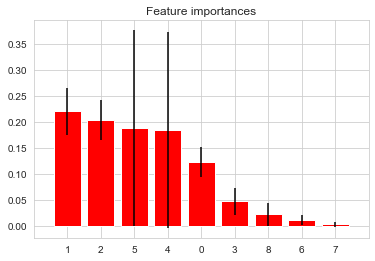

In [39]:
importances = best_random.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_random.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
indices_names=feature_importances.index.values

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f],indices_names[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])

- The most important features are fare, age and the gender (male or female).
- However, random forests are non-linear, therefore this importance feature list does not tell us whether there is a high or zero correlation between features and the output, but it tells us the impurity based feature importance of the forest. That is the importance in terms of reduction of splitting criterion or impurity measure.

**Is your algorithm over-confident? Under-confident?**

In [40]:
from sklearn.calibration import calibration_curve

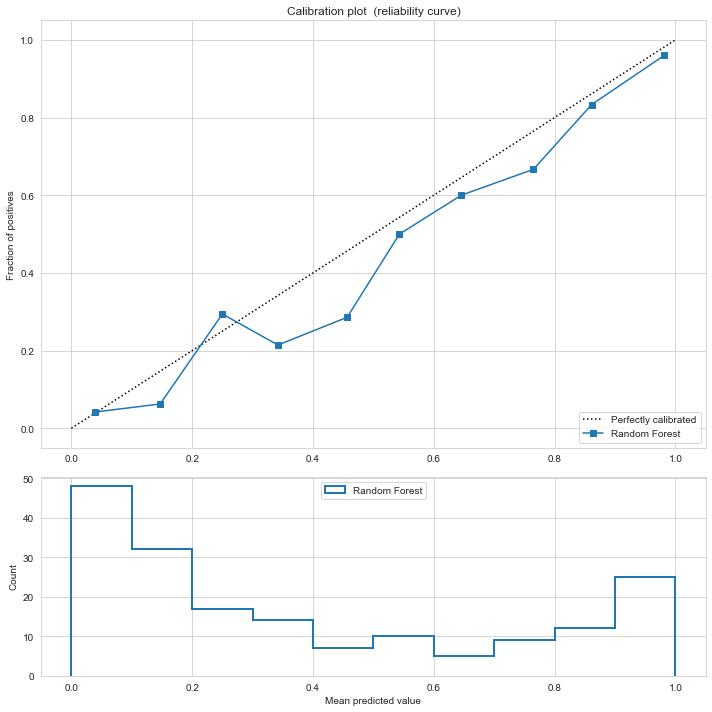

In [41]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

prob_pos = best_random.predict_proba(X_test)[:, 1]

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % ('Random Forest', ))
ax2.hist(prob_pos, range=(0, 1), bins=10, label='Random Forest',histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plot  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

- Based on the calibration plot we can say that our model is over-confident since in general it is most of time to the right of the perfectly calibrated line. In other words, most of the time the mean predicted value of the probability of being positive by the model is greater than the actual fraction of positives. For example, when the fraction of positives is 40%, the model estimates approx 50%.